[[12488185 12489168 12490227 12490227 12490227 12490227 12490227 12490227
  12490227 12490227 12490227 12490227 12490227 12490227 12490227 12490227
  12490227 12490227 12490227 12490227 12490227 12490227 12490227 12490227
  12490227 12490227 12490227 12490227 12490227 12490227]
 [12483503 12488793 12488793 12488793 12488793 12490227 12490227 12490227
  12490227 12490227 12490227 12490227 12490227 12490227 12490227 12490227
  12490227 12490367 12490367 12490367 12490367 12490367 12490367 12490367
  12490367 12490367 12490367 12490367 12490367 12490367]
 [11885633 12480265 12483228 12483228 12486788 12486788 12486788 12486788
  12489184 12489492 12489895 12489895 12489895 12490227 12490227 12490227
  12490227 12490227 12490227 12490227 12490227 12490227 12490227 12490227
  12490227 12490227 12490227 12490227 12490227 12490227]]


C:\Users\thinkbook\AppData\Local\Temp\ipykernel_16076\2617118236.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # 先调整布局


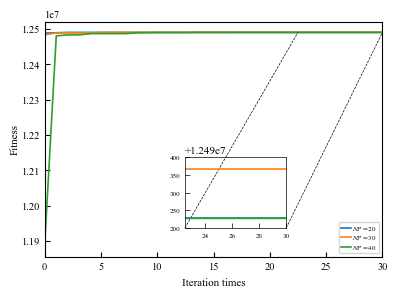

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.pyplot import MultipleLocator
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import FuncFormatter 
from matplotlib.ticker import FuncFormatter, ScalarFormatter

# def format_sci_notation(x, pos):
#     return f'{x:.2e}'  # .2e 表示保留两位小数，总共三位有效数字

def GetDiagramDKP5(path_to_save,ffla1,ffla2,ffla3,ty,horizontal,vertical,syl,syu):
    ['#034653','#E66F51','#E9C46B']
    num=len(ffla1)
    idx =np.linspace(0,num,num)
    x_major_locator=MultipleLocator(5)
    y_major_locator=MultipleLocator(20) 
    labels=['UDKP1','UDKP2','UDKP3','UDKP4','UDKP5','UDKP6','UDKP7','UDKP8','UDKP9','UDKP10'] #X轴

    plt.rcParams["font.size"]=7.5 #字体大小
    plt.rcParams["font.family"] = 'Times New Roman'  #字体样式采用新罗马字体
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['xtick.direction'] = 'in'  # 刻度线向内
    plt.rcParams['ytick.direction'] = 'in'  # 将y轴的刻度方向设置向
    

    fig, ax = plt.subplots(1,1,figsize=(4,3))
    # 定义6组数据（示例结构，需替换为真实数据）
    curves = [
        (idx, ffla1,    '-',  '$NP=20$',   'C0'),  # 红色系
        (idx, ffla2,   '-',  '$NP=30$',   'C1'),  # 蓝色系
        (idx, ffla3,'-',  '$NP=40$',   'C2'),  # 绿色系
        # (idx, ffla4,'o-',  'FFLA4',   'C3'),  # 橙色系（新增）
        # (idx, modde,'^-',  'MODDE',   'C4'),  # 紫色系（新增）
        # (idx, t3_modde,'d-',  'T3_MODDE','C5')   # 棕色系（新增）
    ]

    # 统一绘制逻辑
    for x, y, style, label, color in curves:
        ax.plot(x, y, style, color=color, label=label, 
                linewidth=1.2, markersize=4, markeredgewidth=0.5)

    plt.xlabel("Iteration times",fontsize=8)
    plt.ylabel("Fitness",fontsize=8,labelpad=1)

    ax.ticklabel_format(style='sci', axis='y', useOffset=True, scilimits=(0, 1), useMathText=False)

#     ax.ticklabel_format(style='plain', axis='y')
#     ax.yaxis.set_major_locator(y_major_locator)
    
#     ax.tick_params(axis='y', labelleft=True, pad=1)
    ax.set_xlim(0,num)

    ax.xaxis.set_major_locator(x_major_locator)
    plt.legend(prop = {'size':5},loc='lower right',handlelength=1.5,handletextpad=0.1,columnspacing=0.2,labelspacing=0.2,borderpad=0.3)
    
    
#     axins = inset_axes(ax, width="35%", height="35%", loc='lower left',
#                    bbox_to_anchor=(0.25, 0.2, 1, 1),
#                    bbox_transform=ax.transAxes)
    axins = inset_axes(ax, width="30%", height="30%", loc='lower left',
                   bbox_to_anchor=(horizontal, vertical, 1, 1),
                   bbox_transform=ax.transAxes)
    for spine in axins.spines.values():  #设置子坐标轴的边框宽度
        spine.set_linewidth(0.5)
  
    
#     axins.ticklabel_format(style='sci', axis='y', useOffset=True, scilimits=(0, 0), useMathText=False)
    axins.ticklabel_format(style='plain', axis='y')
    axins.yaxis.get_offset_text().set_fontsize(8)
    
    for x, y, style, label, color in curves:
        axins.plot(x, y, style, color=color, label=label, 
                linewidth=1.2, markersize=4, markeredgewidth=0.5)
    axins.set_xlim(0.75*num,num)  ##嵌入子坐标系x轴显示范围   需要修改！！！
    axins.set_ylim(syl,syu)   ##嵌入子坐标系y轴显示范围   需要修改！！！！
    axins.tick_params(axis='both', which='both', width=0.5,labelsize=5)#设置子坐标轴的刻度宽度
    mark_inset(ax, axins, loc1=4, loc2=3, fc="none", ec='k', lw=0.5,ls='--')#设置子坐标的显示位置
    plt.tight_layout()  # 先调整布局
    fig.canvas.draw()  # 强制渲染图形
    plt.savefig(ty+'.png', format="PNG",dpi=500, bbox_inches='tight',pad_inches=0.02)
    plt.show()
    plt.close()
    
    
    

    
if __name__ =="__main__":
    path_to_save = "Diagram"
    #读取文件中所有数据，注意CSV文件  # bgtoa的数据已经替换为gtoa 为了方便就不改变量名称了
    udkp="UDKP"
    wdkp="WDKP"
    sdkp="SDKP"
    idkp="IDKP"
    
    data = pd.read_csv(r"ukp332.csv" ,header=None)
    data = data.iloc[:, :30]
    data_matrix = data.to_numpy()
    np20, np30, np40 = data_matrix 
    print(data_matrix)
    GetDiagramDKP5(path_to_save, np20, np30, np40, "ukp332",0.4,0.1,12490200,12490400)#27417-27461
    
    


[[10549207 10549207 10549207 10549207 10549757 10549757 10549757 10549757
  10549757 10549757 10549757 10549757 10549757 10549757 10549757 10549757
  10549757 10549757 10549757 10549757 10549757 10549757 10549757 10549757
  10549757 10549757 10549757 10549757 10549757 10549757]
 [10549586 10549586 10549793 10549793 10549793 10549793 10549793 10549793
  10549793 10549793 10549793 10549793 10549793 10549793 10549793 10549793
  10549793 10549793 10549793 10549793 10549793 10549793 10549793 10549793
  10549793 10549793 10549793 10549793 10549793 10549793]
 [10548674 10548674 10549674 10549767 10549767 10549767 10549767 10549767
  10549767 10549767 10549767 10549767 10549767 10549767 10549767 10549767
  10549767 10549767 10549767 10549767 10549767 10549767 10549767 10549767
  10549767 10549767 10549767 10549767 10549767 10549767]]


C:\Users\thinkbook\AppData\Local\Temp\ipykernel_16076\2044890796.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # 先调整布局


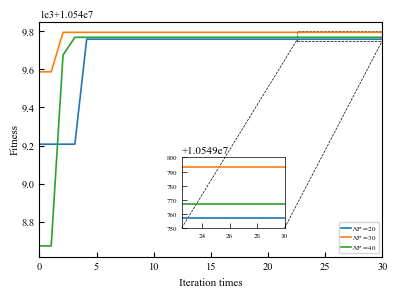

[[8797160 8797160 8797160 8797806 8797806 8797806 8797806 8797806 8797806
  8797806 8797806 8797806 8797806 8797823 8797823 8797823 8797823 8797823
  8797823 8797823 8797823 8797823 8797823 8797823 8797823 8797823 8797823
  8797823 8797823 8797823]
 [8797917 8797917 8797917 8797917 8797917 8797917 8797917 8797917 8797975
  8797975 8797975 8797975 8797975 8797975 8797975 8797975 8797975 8797975
  8797975 8797975 8797975 8797975 8797975 8797975 8797975 8797975 8797975
  8797975 8797975 8797975]
 [8797398 8797408 8797408 8797408 8797678 8797678 8797917 8797917 8797917
  8797917 8797917 8797917 8797917 8797917 8797917 8797917 8797917 8797917
  8797917 8797917 8797917 8797917 8797917 8797917 8797917 8797917 8797917
  8797917 8797917 8797917]]


C:\Users\thinkbook\AppData\Local\Temp\ipykernel_16076\2044890796.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # 先调整布局


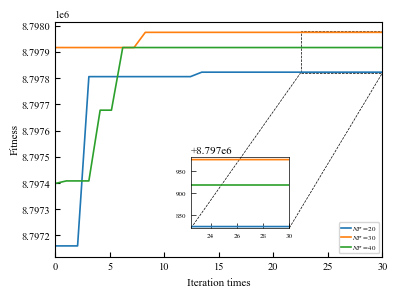

[[950399 950399 950399 950456 950456 950456 950456 950456 950456 950483
  950483 950483 950483 950483 950483 950483 950483 950483 950483 950498
  950498 950498 950498 950498 950498 950498 950498 950498 950498 950498]
 [950400 950501 950501 950501 950501 950501 950501 950501 950501 950501
  950501 950501 950501 950501 950501 950501 950501 950501 950501 950501
  950501 950501 950501 950501 950501 950501 950501 950501 950501 950501]
 [944312 950348 950471 950471 950471 950471 950471 950471 950471 950471
  950471 950471 950471 950471 950471 950471 950471 950471 950471 950471
  950471 950474 950474 950474 950474 950474 950482 950482 950482 950482]]


C:\Users\thinkbook\AppData\Local\Temp\ipykernel_16076\2044890796.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # 先调整布局


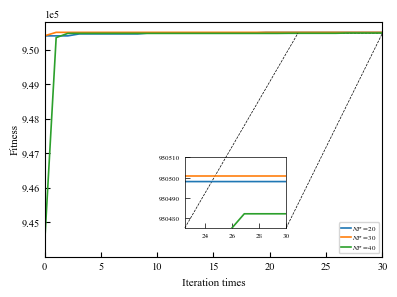

[[1295901 1296511 1296511 1296659 1296945 1297035 1297241 1297241 1297241
  1297241 1297241 1297241 1297241 1297241 1297241 1297241 1297241 1297241
  1297241 1297241 1297241 1297241 1297241 1297241 1297241 1297241 1297241
  1297241 1297241 1297241]
 [1297181 1297241 1297241 1297241 1297241 1297241 1297241 1297241 1297241
  1297241 1297241 1297241 1297241 1297241 1297241 1297241 1297241 1297253
  1297253 1297253 1297253 1297253 1297253 1297253 1297253 1297253 1297253
  1297253 1297253 1297253]
 [1276753 1297228 1297228 1297228 1297228 1297228 1297228 1297228 1297228
  1297228 1297228 1297228 1297228 1297228 1297228 1297228 1297228 1297241
  1297241 1297241 1297241 1297241 1297241 1297241 1297241 1297241 1297241
  1297241 1297241 1297241]]


C:\Users\thinkbook\AppData\Local\Temp\ipykernel_16076\2044890796.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # 先调整布局


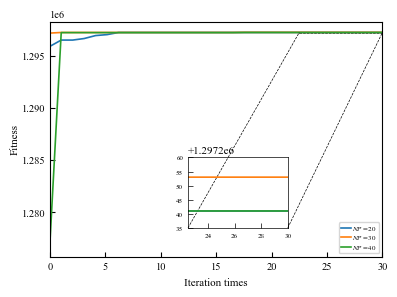

[[1102852 1104487 1104811 1104811 1104811 1104811 1104811 1104811 1104811
  1104811 1104811 1104811 1104811 1104811 1104835 1104835 1104835 1104835
  1104835 1104835 1104835 1104835 1104835 1104835 1104835 1104835 1104835
  1104835 1104835 1104835]
 [1104704 1104835 1104835 1104835 1104835 1104852 1104852 1104852 1104852
  1104852 1104852 1104852 1104852 1104868 1104868 1104868 1104868 1104868
  1104868 1104868 1104868 1104868 1104868 1104868 1104868 1104868 1104868
  1104868 1104868 1104868]
 [1104581 1104766 1104766 1104766 1104766 1104766 1104766 1104848 1104848
  1104848 1104848 1104848 1104848 1104848 1104848 1104848 1104848 1104848
  1104850 1104850 1104850 1104850 1104850 1104850 1104850 1104854 1104854
  1104854 1104854 1104858]]


C:\Users\thinkbook\AppData\Local\Temp\ipykernel_16076\2044890796.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # 先调整布局


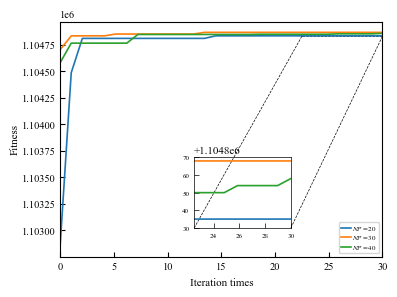

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.pyplot import MultipleLocator
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import FuncFormatter 
from matplotlib.ticker import FuncFormatter, ScalarFormatter

# def format_sci_notation(x, pos):
#     return f'{x:.2e}'  # .2e 表示保留两位小数，总共三位有效数字

def GetDiagramDKP5(path_to_save,ffla1,ffla2,ffla3,ty,horizontal,vertical,syl,syu):
    ['#034653','#E66F51','#E9C46B']
    num=len(ffla1)
    idx =np.linspace(0,num,num)
    x_major_locator=MultipleLocator(5)
    y_major_locator=MultipleLocator(20) 
    labels=['UDKP1','UDKP2','UDKP3','UDKP4','UDKP5','UDKP6','UDKP7','UDKP8','UDKP9','UDKP10'] #X轴

    plt.rcParams["font.size"]=7.5 #字体大小
    plt.rcParams["font.family"] = 'Times New Roman'  #字体样式采用新罗马字体
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['xtick.direction'] = 'in'  # 刻度线向内
    plt.rcParams['ytick.direction'] = 'in'  # 将y轴的刻度方向设置向
    

    fig, ax = plt.subplots(1,1,figsize=(4,3))
    # 定义6组数据（示例结构，需替换为真实数据）
    curves = [
        (idx, ffla1,    '-',  '$NP=20$',   'C0'),  # 红色系
        (idx, ffla2,   '-',  '$NP=30$',   'C1'),  # 蓝色系
        (idx, ffla3,'-',  '$NP=40$',   'C2'),  # 绿色系
        # (idx, ffla4,'o-',  'FFLA4',   'C3'),  # 橙色系（新增）
        # (idx, modde,'^-',  'MODDE',   'C4'),  # 紫色系（新增）
        # (idx, t3_modde,'d-',  'T3_MODDE','C5')   # 棕色系（新增）
    ]

    # 统一绘制逻辑
    for x, y, style, label, color in curves:
        ax.plot(x, y, style, color=color, label=label, 
                linewidth=1.2, markersize=4, markeredgewidth=0.5)

    plt.xlabel("Iteration times",fontsize=8)
    plt.ylabel("Fitness",fontsize=8,labelpad=1)

    ax.ticklabel_format(style='sci', axis='y', useOffset=True, scilimits=(0, 1), useMathText=False)

#     ax.ticklabel_format(style='plain', axis='y')
#     ax.yaxis.set_major_locator(y_major_locator)
    
#     ax.tick_params(axis='y', labelleft=True, pad=1)
    ax.set_xlim(0,num)

    ax.xaxis.set_major_locator(x_major_locator)
    plt.legend(prop = {'size':5},loc='lower right',handlelength=1.5,handletextpad=0.1,columnspacing=0.2,labelspacing=0.2,borderpad=0.3)
    
    
#     axins = inset_axes(ax, width="35%", height="35%", loc='lower left',
#                    bbox_to_anchor=(0.25, 0.2, 1, 1),
#                    bbox_transform=ax.transAxes)
    axins = inset_axes(ax, width="30%", height="30%", loc='lower left',
                   bbox_to_anchor=(horizontal, vertical, 1, 1),
                   bbox_transform=ax.transAxes)
    for spine in axins.spines.values():  #设置子坐标轴的边框宽度
        spine.set_linewidth(0.5)
  
    
#     axins.ticklabel_format(style='sci', axis='y', useOffset=True, scilimits=(0, 0), useMathText=False)
    axins.ticklabel_format(style='plain', axis='y')
    axins.yaxis.get_offset_text().set_fontsize(8)
    
    for x, y, style, label, color in curves:
        axins.plot(x, y, style, color=color, label=label, 
                linewidth=1.2, markersize=4, markeredgewidth=0.5)
    axins.set_xlim(0.75*num,num)  ##嵌入子坐标系x轴显示范围   需要修改！！！
    axins.set_ylim(syl,syu)   ##嵌入子坐标系y轴显示范围   需要修改！！！！
    axins.tick_params(axis='both', which='both', width=0.5,labelsize=5)#设置子坐标轴的刻度宽度
    mark_inset(ax, axins, loc1=4, loc2=3, fc="none", ec='k', lw=0.5,ls='--')#设置子坐标的显示位置
    plt.tight_layout()  # 先调整布局
    fig.canvas.draw()  # 强制渲染图形
    plt.savefig(ty+'.png', format="PNG",dpi=500, bbox_inches='tight',pad_inches=0.02)
    plt.show()
    plt.close()
    
    
    

    
if __name__ =="__main__":
    path_to_save = "Diagram"
    #读取文件中所有数据，注意CSV文件  # bgtoa的数据已经替换为gtoa 为了方便就不改变量名称了
    udkp="UDKP"
    wdkp="WDKP"
    sdkp="SDKP"
    idkp="IDKP"
    
    data = pd.read_csv(r"skp332.csv" ,header=None)
    data = data.iloc[:, :30]
    data_matrix = data.to_numpy()
    np20, np30, np40 = data_matrix 
    print(data_matrix)
    GetDiagramDKP5(path_to_save, np20, np30, np40, "skp332",0.4,0.1,10549750,10549800)

    data = pd.read_csv(r"wkp332.csv" ,header=None)
    data = data.iloc[:, :30]
    data_matrix = data.to_numpy()
    np20, np30, np40 = data_matrix 
    print(data_matrix)
    GetDiagramDKP5(path_to_save, np20, np30, np40, "wkp332",0.4,0.1,8797820,8797980)

    data = pd.read_csv(r"wkp322.csv" ,header=None)
    data = data.iloc[:, :30]
    data_matrix = data.to_numpy()
    np20, np30, np40 = data_matrix 
    print(data_matrix)
    GetDiagramDKP5(path_to_save, np20, np30, np40, "wkp322",0.4,0.1,950475,950510)

    data = pd.read_csv(r"ukp322.csv" ,header=None)
    data = data.iloc[:, :30]
    data_matrix = data.to_numpy()
    np20, np30, np40 = data_matrix 
    print(data_matrix)
    GetDiagramDKP5(path_to_save, np20, np30, np40, "ukp322",0.4,0.1,1297235,1297260)

    data = pd.read_csv(r"skp322.csv" ,header=None)
    data = data.iloc[:, :30]
    data_matrix = data.to_numpy() 
    np20, np30, np40 = data_matrix 
    print(data_matrix)
    GetDiagramDKP5(path_to_save, np20, np30, np40, "skp322",0.4,0.1,1104830,1104870)
    
    
